In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

exp_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()

## Preliminary Data Exploration

We'll start with some basic exploration of the data set.

In [2]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [3]:
list(exp_df.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [4]:
exp_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


## Null Values

Now we'll check for null values in the data.

In [5]:
exp_df.isnull().sum()*100/exp_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

Hepatitis B, GDP, and Population are the variables with significant amounts of missing data.

Given the structure of this data set, I think it makes most sense to fill null values with the average of existing values for a particular country within the same column. We will do that now.

In [6]:
exp2_df = exp_df.copy()

In [7]:
fill_list = ['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [8]:
exp2_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', "Côte d'Ivoire", 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Slovakia', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia

In [9]:
countries = []
countries = exp2_df['Country'].unique().tolist()

In [10]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 "Côte d'Ivoire",
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Slovakia',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',

In [11]:
for col in fill_list:
    for country in countries:
        exp2_df.loc[exp2_df["Country"] == country, col] = exp2_df.loc[exp2_df["Country"] == country, col].fillna(
            exp2_df[exp2_df["Country"] == country][col].mean(), inplace=False)

In [17]:
exp2_df.isna().sum()*100/exp2_df.isna().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             0.578625
percentage expenditure              0.000000
Hepatitis B                         4.901293
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   1.089176
Diphtheria                          0.000000
 HIV/AIDS                           0.000000
GDP                                13.784888
Population                         22.055820
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

We can see that our method drastically reduced the missing data for Hepatitis B and slightly improved GDP and Population.

## Outliers

We'll now search for outliers. We'll begin with a visual approach.

Text(0.5, 1.0, 'Schoooling')

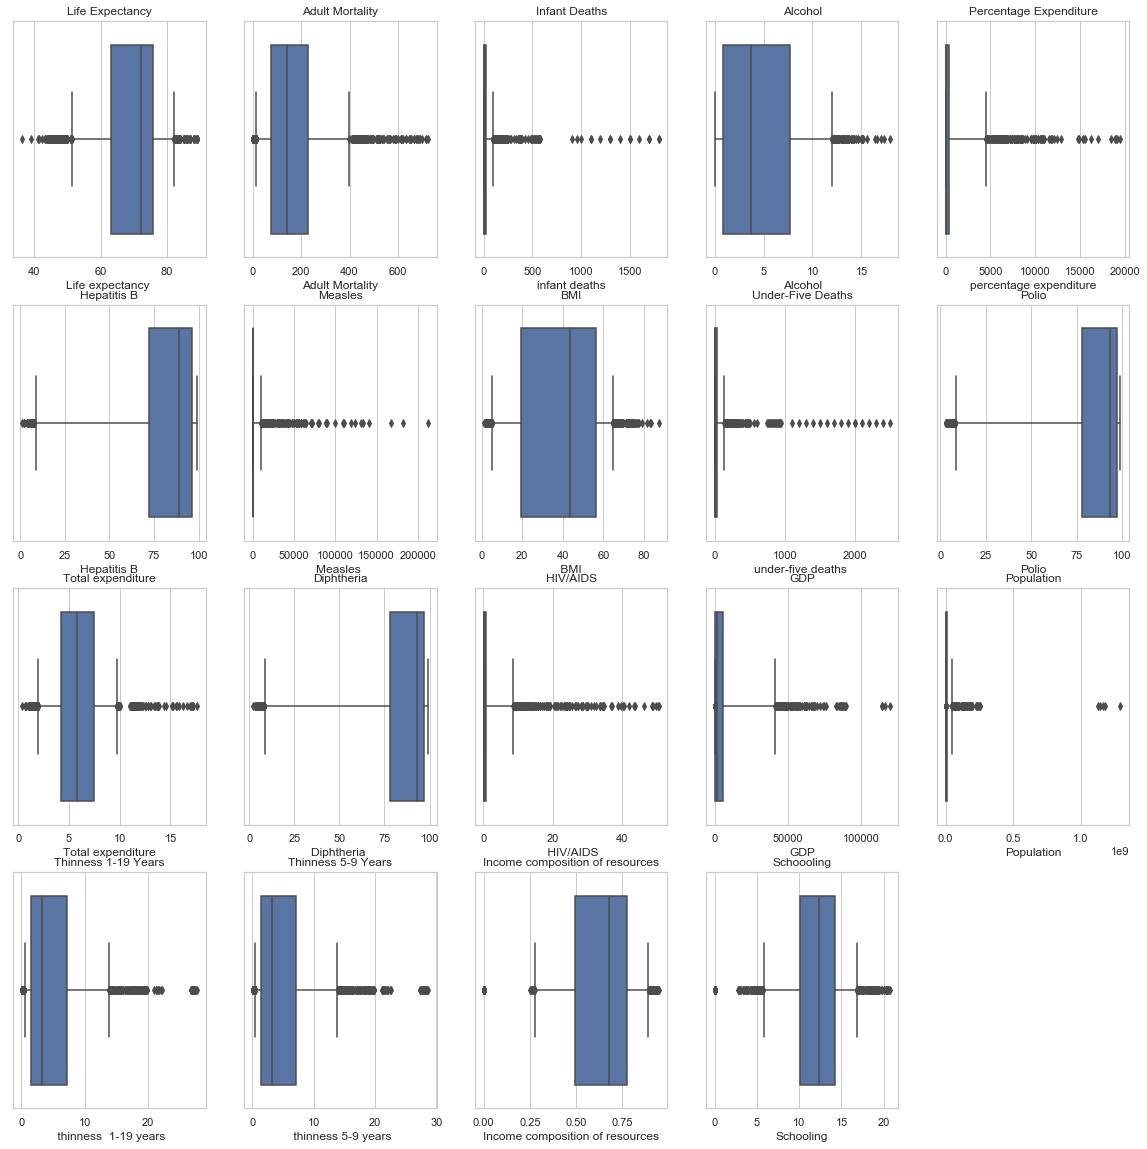

In [19]:
plt.figure(figsize=(20,20))

plt.subplot(4, 5, 1)
sns.boxplot(exp2_df['Life expectancy '], whis=[5, 95])
plt.title('Life Expectancy')

plt.subplot(4, 5, 2)
sns.boxplot(exp2_df['Adult Mortality'], whis=[5, 95])
plt.title('Adult Mortality')

plt.subplot(4, 5, 3)
sns.boxplot(exp2_df['infant deaths'], whis=[5, 95])
plt.title('Infant Deaths')

plt.subplot(4, 5, 4)
sns.boxplot(exp2_df['Alcohol'], whis=[5, 95])
plt.title('Alcohol')

plt.subplot(4, 5, 5)
sns.boxplot(exp2_df['percentage expenditure'], whis=[5, 95])
plt.title('Percentage Expenditure')

plt.subplot(4, 5, 6)
sns.boxplot(exp2_df['Hepatitis B'], whis=[5, 95])
plt.title('Hepatitis B')

plt.subplot(4, 5, 7)
sns.boxplot(exp2_df['Measles '], whis=[5, 95])
plt.title('Measles')

plt.subplot(4, 5, 8)
sns.boxplot(exp2_df[' BMI '], whis=[5, 95])
plt.title('BMI')

plt.subplot(4, 5, 9)
sns.boxplot(exp2_df['under-five deaths '], whis=[5, 95])
plt.title('Under-Five Deaths')

plt.subplot(4, 5, 10)
sns.boxplot(exp2_df['Polio'], whis=[5, 95])
plt.title('Polio')

plt.subplot(4, 5, 11)
sns.boxplot(exp2_df['Total expenditure'], whis=[5, 95])
plt.title('Total expenditure')

plt.subplot(4, 5, 12)
sns.boxplot(exp2_df['Diphtheria '], whis=[5, 95])
plt.title('Diphtheria')

plt.subplot(4, 5, 13)
sns.boxplot(exp2_df[' HIV/AIDS'], whis=[5, 95])
plt.title('HIV/AIDS')

plt.subplot(4, 5, 14)
sns.boxplot(exp2_df['GDP'], whis=[5, 95])
plt.title('GDP')

plt.subplot(4, 5, 15)
sns.boxplot(exp2_df['Population'], whis=[5, 95])
plt.title('Population')

plt.subplot(4, 5, 16)
sns.boxplot(exp2_df[' thinness  1-19 years'], whis=[5, 95])
plt.title('Thinness 1-19 Years')

plt.subplot(4, 5, 17)
sns.boxplot(exp2_df[' thinness 5-9 years'], whis=[5, 95])
plt.title('Thinness 5-9 Years')

plt.subplot(4, 5, 18)
sns.boxplot(exp2_df['Income composition of resources'], whis=[5, 95])
plt.title('Income composition of resources')

plt.subplot(4, 5, 19)
sns.boxplot(exp2_df['Schooling'], whis=[5, 95])
plt.title('Schoooling')


We can see from these box plots that Infant Deaths, Percentage Expenditure, Measles, Under 5 Deaths, and HIV/AIDS all have very compressed interquartile ranges with extreme outliers.

## Tukey's Method

We'll now use Tukey's Method on the aforementioned variables to try to quantify the number of outliers.

In [33]:
q75, q25 = np.percentile(exp2_df['infant deaths'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    n_high = len(np.where(exp2_df['infant deaths'] > max_val)[0])
    n_low = len(np.where(exp2_df['infant deaths'] < min_val)[0])
    print("The score threshold is: {}".format(threshold))
    print('The number of outliers is {}'.format(n_high))

The score threshold is: 1.0
The number of outliers is 419
The score threshold is: 1.5
The number of outliers is 315
The score threshold is: 2.0
The number of outliers is 226
The score threshold is: 2.5
The number of outliers is 187
The score threshold is: 3.0
The number of outliers is 158
The score threshold is: 3.5
The number of outliers is 138
The score threshold is: 4.0
The number of outliers is 130
The score threshold is: 4.5
The number of outliers is 121


In [34]:
q75, q25 = np.percentile(exp2_df['percentage expenditure'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    n_high = len(np.where(exp2_df['percentage expenditure'] > max_val)[0])
    n_low = len(np.where(exp2_df['percentage expenditure'] < min_val)[0])
    print("The score threshold is: {}".format(threshold))
    print('The number of outliers is {}'.format(n_high))

The score threshold is: 1.0
The number of outliers is 454
The score threshold is: 1.5
The number of outliers is 389
The score threshold is: 2.0
The number of outliers is 349
The score threshold is: 2.5
The number of outliers is 323
The score threshold is: 3.0
The number of outliers is 300
The score threshold is: 3.5
The number of outliers is 279
The score threshold is: 4.0
The number of outliers is 258
The score threshold is: 4.5
The number of outliers is 241


In [29]:
q75, q25 = np.percentile(exp2_df['Measles '], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    n_high = len(np.where(exp2_df['Measles '] > max_val)[0])
    n_low = len(np.where(exp2_df['Measles '] < min_val)[0])
    print("The score threshold is: {}".format(threshold))
    print('The number of outliers is {}'.format(n_high))

The score threshold is: 1.0
The number of outliers is 593
The score threshold is: 1.5
The number of outliers is 542
The score threshold is: 2.0
The number of outliers is 513
The score threshold is: 2.5
The number of outliers is 480
The score threshold is: 3.0
The number of outliers is 451
The score threshold is: 3.5
The number of outliers is 423
The score threshold is: 4.0
The number of outliers is 409
The score threshold is: 4.5
The number of outliers is 396


In [35]:
q75, q25 = np.percentile(exp2_df['under-five deaths '], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    n_high = len(np.where(exp2_df['under-five deaths '] > max_val)[0])
    n_low = len(np.where(exp2_df['under-five deaths '] < min_val)[0])
    print("The score threshold is: {}".format(threshold))
    print('The number of outliers is {}'.format(n_high))

The score threshold is: 1.0
The number of outliers is 465
The score threshold is: 1.5
The number of outliers is 394
The score threshold is: 2.0
The number of outliers is 308
The score threshold is: 2.5
The number of outliers is 232
The score threshold is: 3.0
The number of outliers is 195
The score threshold is: 3.5
The number of outliers is 163
The score threshold is: 4.0
The number of outliers is 145
The score threshold is: 4.5
The number of outliers is 133


In [36]:
q75, q25 = np.percentile(exp2_df[' HIV/AIDS'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    n_high = len(np.where(exp2_df[' HIV/AIDS'] > max_val)[0])
    n_low = len(np.where(exp2_df[' HIV/AIDS'] < min_val)[0])
    print("The score threshold is: {}".format(threshold))
    print('The number of outliers is {}'.format(n_high))

The score threshold is: 1.0
The number of outliers is 584
The score threshold is: 1.5
The number of outliers is 542
The score threshold is: 2.0
The number of outliers is 474
The score threshold is: 2.5
The number of outliers is 435
The score threshold is: 3.0
The number of outliers is 403
The score threshold is: 3.5
The number of outliers is 373
The score threshold is: 4.0
The number of outliers is 347
The score threshold is: 4.5
The number of outliers is 325


From this analysis we can see that Measles has the most outliers, both at the low and high end of the thresholds. Also, infant deaths has the least number of outliers in this group.

## Data Exploration of Adjusted Data Set

In [23]:
exp2_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2921.000000,2938.000000,2794.000000,2938.000000,2904.000000,2938.000000,2938.000000,2906.000000,2938.000000,2938.000000,2533.000000,2.290000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.600849,738.251295,78.648111,2419.592240,38.321247,42.035739,82.396266,5.920966,82.183944,1.742103,7378.404536,1.273472e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.038985,1987.914858,25.183816,11467.272489,20.044034,160.445548,23.476067,2.469245,23.743205,5.077785,14172.071842,6.096040e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.910000,4.685343,72.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,459.291200,1.965672e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.730000,64.912906,89.000000,17.000000,43.500000,4.000000,93.000000,5.745333,93.000000,0.100000,1726.915100,1.396073e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.700000,441.534144,96.000000,360.250000,56.200000,28.000000,97.000000,7.440000,97.000000,0.800000,5828.745662,7.407576e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We'll take a quick look at the histograms of each variable to get an idea of their distributions.

Text(0.5, 1.0, 'Schoooling')

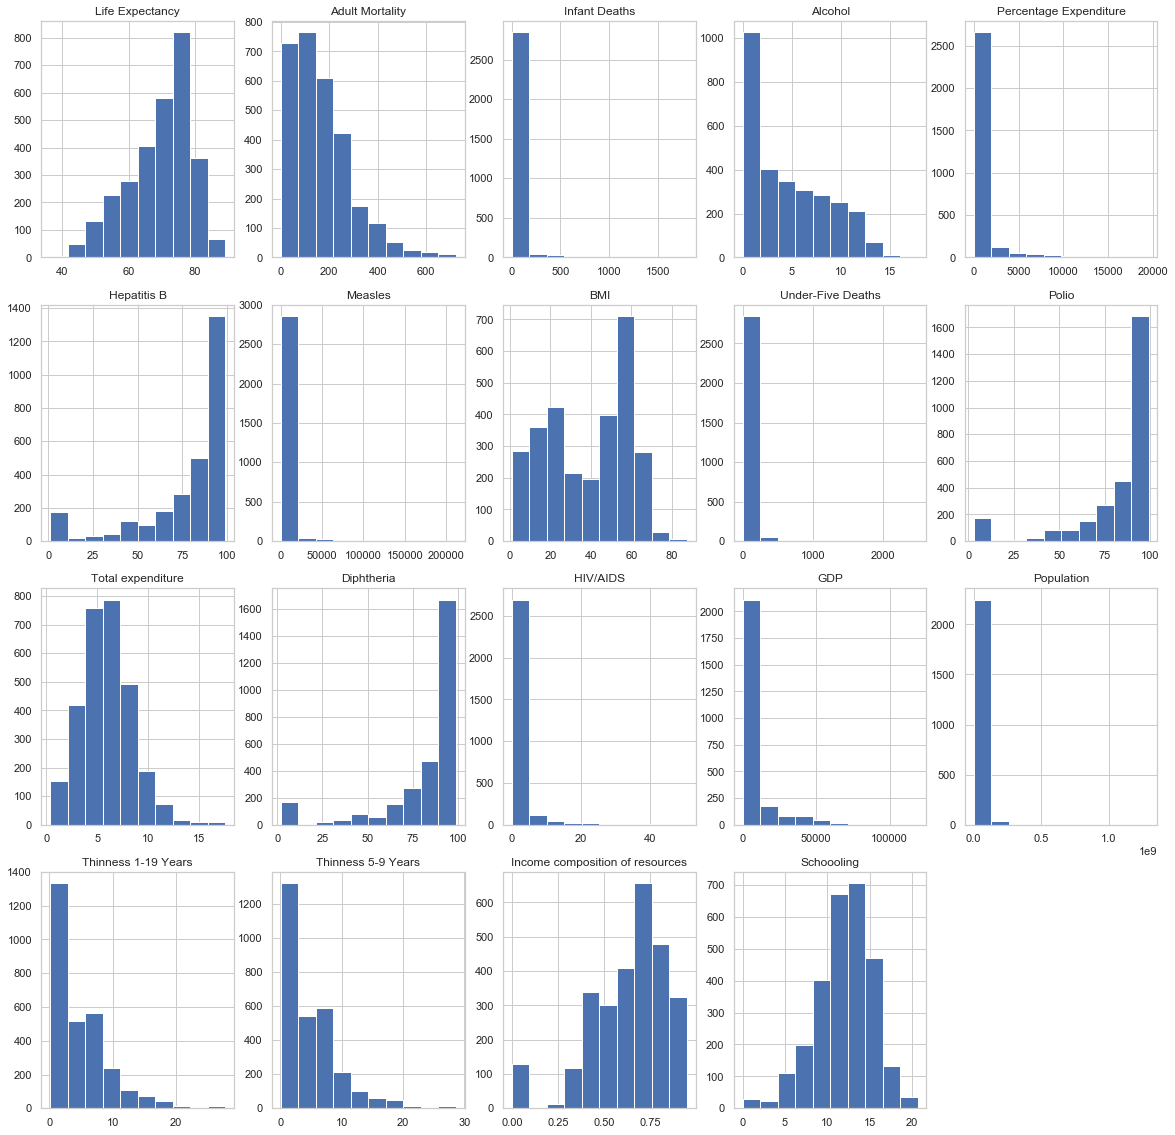

In [24]:
plt.figure(figsize=(20,20))

plt.subplot(4, 5, 1)
plt.hist(exp2_df['Life expectancy '])
plt.title('Life Expectancy')

plt.subplot(4, 5, 2)
plt.hist(exp2_df['Adult Mortality'])
plt.title('Adult Mortality')

plt.subplot(4, 5, 3)
plt.hist(exp2_df['infant deaths'])
plt.title('Infant Deaths')

plt.subplot(4, 5, 4)
plt.hist(exp2_df['Alcohol'])
plt.title('Alcohol')

plt.subplot(4, 5, 5)
plt.hist(exp2_df['percentage expenditure'])
plt.title('Percentage Expenditure')

plt.subplot(4, 5, 6)
plt.hist(exp2_df['Hepatitis B'])
plt.title('Hepatitis B')

plt.subplot(4, 5, 7)
plt.hist(exp2_df['Measles '])
plt.title('Measles')

plt.subplot(4, 5, 8)
plt.hist(exp2_df[' BMI '])
plt.title('BMI')

plt.subplot(4, 5, 9)
plt.hist(exp2_df['under-five deaths '])
plt.title('Under-Five Deaths')

plt.subplot(4, 5, 10)
plt.hist(exp2_df['Polio'])
plt.title('Polio')

plt.subplot(4, 5, 11)
plt.hist(exp2_df['Total expenditure'])
plt.title('Total expenditure')

plt.subplot(4, 5, 12)
plt.hist(exp2_df['Diphtheria '])
plt.title('Diphtheria')

plt.subplot(4, 5, 13)
plt.hist(exp2_df[' HIV/AIDS'])
plt.title('HIV/AIDS')

plt.subplot(4, 5, 14)
plt.hist(exp2_df['GDP'])
plt.title('GDP')

plt.subplot(4, 5, 15)
plt.hist(exp2_df['Population'])
plt.title('Population')

plt.subplot(4, 5, 16)
plt.hist(exp2_df[' thinness  1-19 years'])
plt.title('Thinness 1-19 Years')

plt.subplot(4, 5, 17)
plt.hist(exp2_df[' thinness 5-9 years'])
plt.title('Thinness 5-9 Years')

plt.subplot(4, 5, 18)
plt.hist(exp2_df['Income composition of resources'])
plt.title('Income composition of resources')

plt.subplot(4, 5, 19)
plt.hist(exp2_df['Schooling'])
plt.title('Schoooling')


It doesn't look like any variables are truly normally distributed, although Total Expenditure and Schooling might be close enough to use statistical methods that assume a normal distribution.

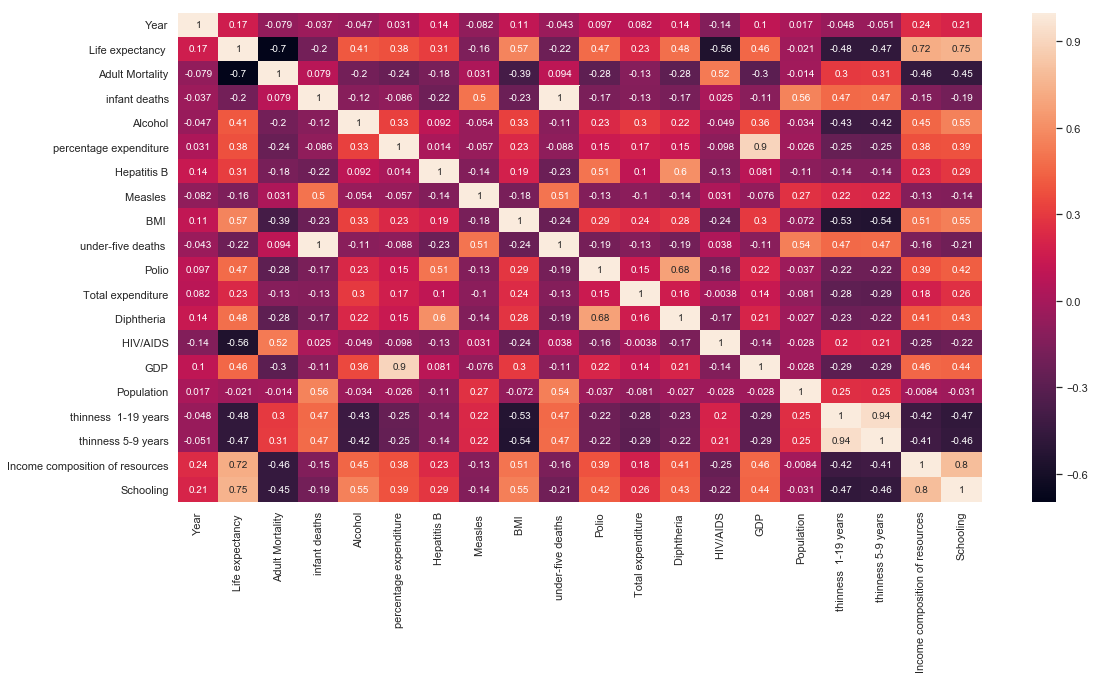

In [25]:
plt.figure(figsize=(18,9))
sns.heatmap(exp2_df.corr(), annot=True)